In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('student_habits_performance.csv')

# Entendendo os dados

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [46]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [47]:
# Dados faltantes no dataset
print(df.isnull().sum())

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


In [48]:
# Substitui o conteúdo vazio com Unknown
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')

# Análise demográfica

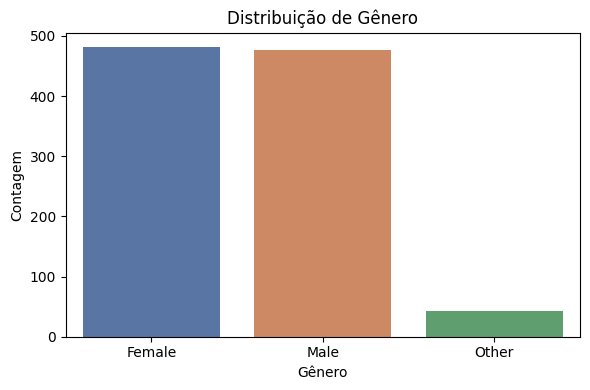

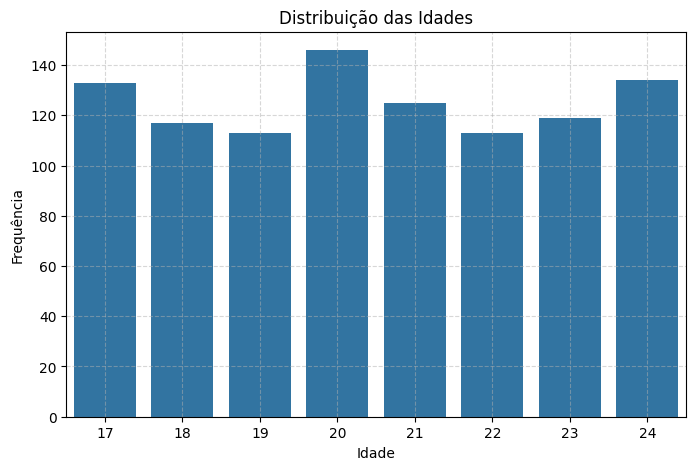

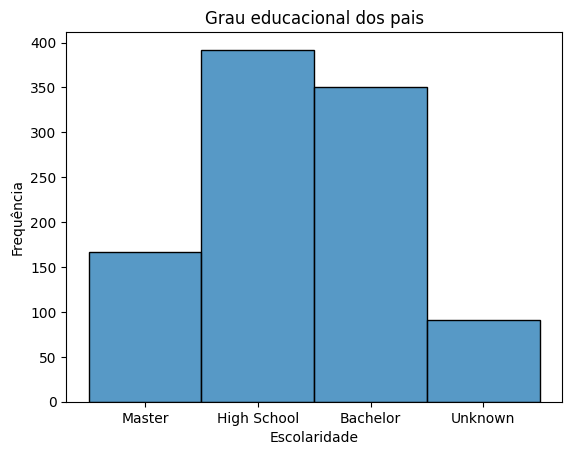

In [49]:
# Distribuição de gênero
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, hue='gender', palette='deep')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

# Distribuição da idade
plt.figure(figsize=(8, 5))
sns.countplot(x='age', data=df)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Distribuição da escolaridade parental
sns.histplot(df['parental_education_level'])
plt.title('Grau educacional dos pais')
plt.ylabel('Frequência')
plt.xlabel('Escolaridade')
plt.show()

# Análise comportamental

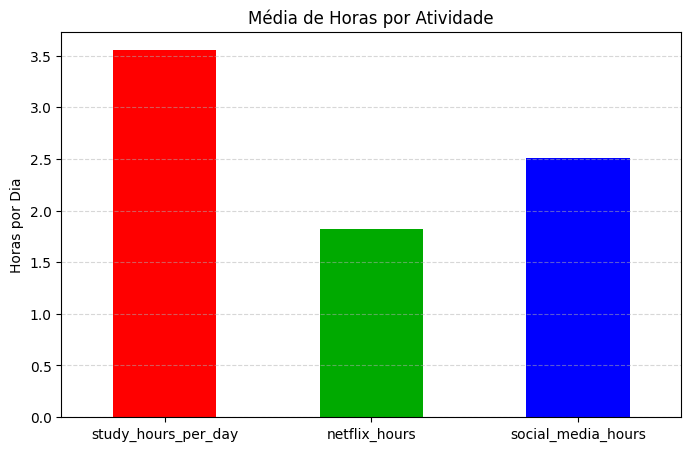

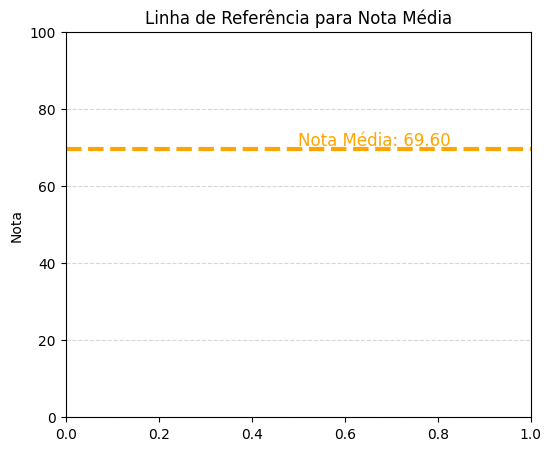

In [50]:
# Médias de atividades
activity_means = df[['study_hours_per_day', 'netflix_hours', 'social_media_hours']].mean()

plt.figure(figsize=(8, 5))
activity_means.plot(kind='bar', color=['#ff0000', '#00aa00', '#0000ff'])
plt.title('Média de Horas por Atividade')
plt.ylabel('Horas por Dia')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Média da nota
mean_score = df['exam_score'].mean()

plt.figure(figsize=(6, 5))
plt.axhline(mean_score, color='orange', linestyle='--', linewidth=3)
plt.text(0.5, mean_score + 1, f'Nota Média: {mean_score:.2f}', color='orange', fontsize=12)
plt.ylim(0, 100)
plt.title('Linha de Referência para Nota Média')
plt.ylabel('Nota')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# Análise Bivariada

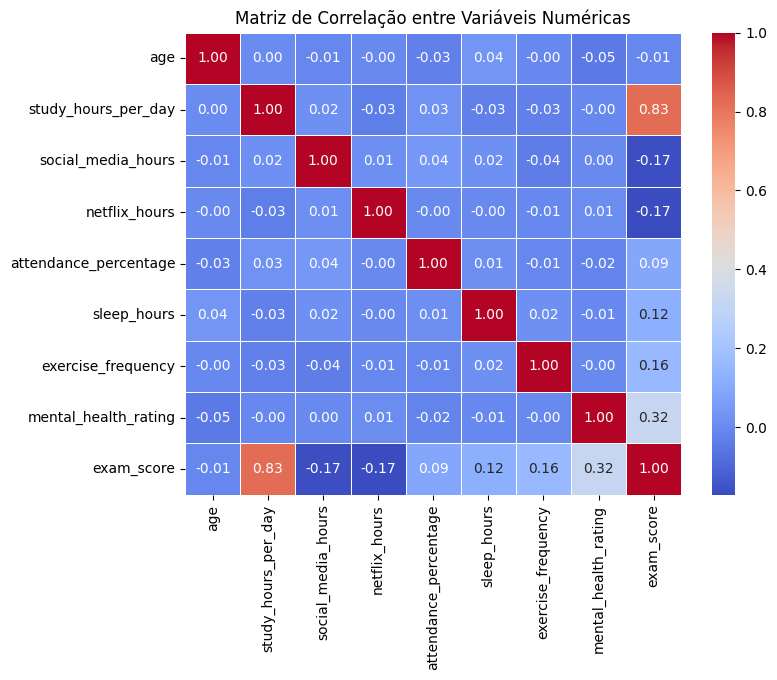

In [51]:
# Apenas características numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Análise Inferencial

Verificar se existe diferença significativa entre as médias de nota de exame dos dois grupos (com vs. sem trabalho).
O teste t de Student para duas amostras independentes compara a média de uma variável contínua (nota) entre dois grupos distintos (trabalham ou não).

In [52]:
from scipy.stats import ttest_ind

# Selecionar os grupos
group_yes = df[df['part_time_job'] == 'Yes']['exam_score'].dropna()
group_no = df[df['part_time_job'] == 'No']['exam_score'].dropna()

# Executar o teste t
t_stat, p_value = ttest_ind(group_yes, group_no)

print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.3f}")

if p_value < 0.05:
    print("Diferença estatisticamente significativa nas notas.")
else:
    print("Nenhuma diferença estatisticamente significativa nas notas.")

T-Statistic: -0.841
P-Value: 0.401
Nenhuma diferença estatisticamente significativa nas notas.


---
Avaliar se a frequência de exercícios muda significativamente com base na qualidade da dieta. O teste ANOVA (Análise de Variância) verifica se há diferença estatística entre as médias de três ou mais grupos.

In [53]:
from scipy.stats import f_oneway

# Agrupar por qualidade da dieta
groups = [g['exercise_frequency'].dropna() for _, g in df.groupby('diet_quality')]

# Teste ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat:.3f}")
print(f"P-Value: {p_value:.3f}")

if p_value < 0.05:
    print("Diferença estatisticamente significativa entre os grupos de dieta.")
else:
    print("Nenhuma diferença estatística entre os grupos de dieta.")

F-Statistic: 0.815
P-Value: 0.443
Nenhuma diferença estatística entre os grupos de dieta.


---
Verificar se há associação entre qualidade da dieta e qualidade da internet — duas variáveis categóricas. O teste qui-quadrado de independência avalia se duas variáveis categóricas estão associadas (ex: se a dieta ruim se relaciona com internet ruim).

In [54]:
from scipy.stats import chi2_contingency

# Tabela de contingência
contingency = pd.crosstab(df['diet_quality'], df['internet_quality'])

# Teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi²: {chi2:.3f}")
print(f"P-Value: {p:.3f}")
print("Grau de liberdade:", dof)

if p < 0.05:
    print("Existe associação significativa entre qualidade da dieta e da internet.")
else:
    print("Não há associação estatisticamente significativa.")

Chi²: 2.885
P-Value: 0.577
Grau de liberdade: 4
Não há associação estatisticamente significativa.


# Modelagem preditiva

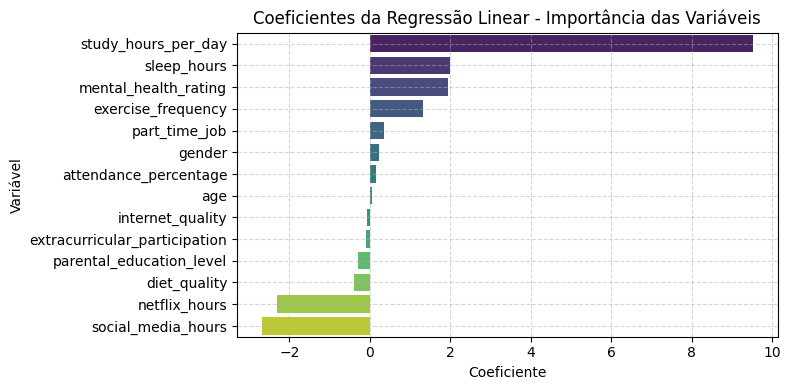

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Prepare data
df_encoded = df.copy()
label_encoders = {}

# Encode categorical columns
for col in df_encoded.select_dtypes(include='object'):
    if col != 'student_id':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# Features and target
X = df_encoded.drop(columns=['student_id', 'exam_score'])
y = df_encoded['exam_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results.append((name, rmse, r2))

# Convert to DataFrame for display
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R² Score"])
results_df.sort_values(by="RMSE", inplace=True)
results_df

# Plot the coefficients again
plt.figure(figsize=(8, 4))
sns.barplot(data=linear_coeffs, x="Linear Coefficient", y="Feature", hue='Feature', palette="viridis")
plt.title("Coeficientes da Regressão Linear - Importância das Variáveis")
plt.xlabel("Coeficiente")
plt.ylabel("Variável")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Regressão Linear - Impacto dos coeficientes

## Positivo
- study_hours_per_day (+9.53): variável com maior impacto positivo nas notas.

- sleep_hours e mental_health_rating (+~2): boas rotinas e saúde mental aumentam o desempenho.

- exercise_frequency (+1.32): atividade física também tem papel relevante.

- part_time_job (+0.35): efeito pequeno, mas levemente positivo.

## Negativo
- social_media_hours (−2.69) e netflix_hours (−2.32): alto consumo de lazer digital está fortemente associado a notas mais baixas.

- diet_quality (−0.39): pior dieta impacta negativamente o desempenho.

- parental_education_level, internet_quality, extracurricular_participation: impacto leve, mas negativo.

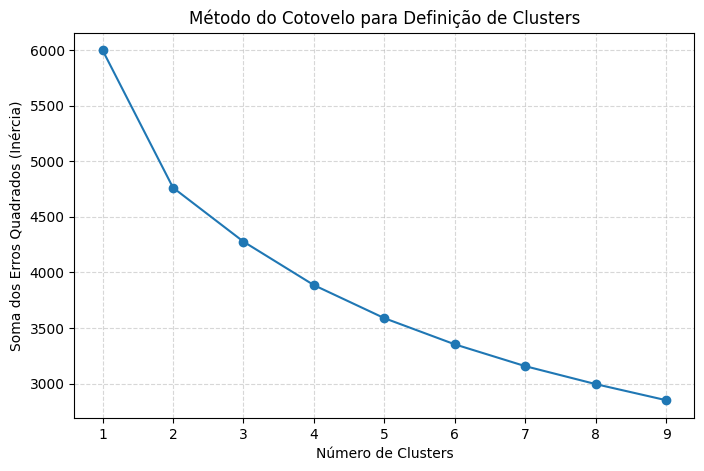

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Seleção e remoção de valores ausentes
features = [
    'study_hours_per_day',
    'netflix_hours',
    'social_media_hours',
    'exam_score',
    'mental_health_rating',
    'attendance_percentage'
]
df_cluster = df[features].dropna()

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), sse, marker='o')
plt.title('Método do Cotovelo para Definição de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Erros Quadrados (Inércia)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


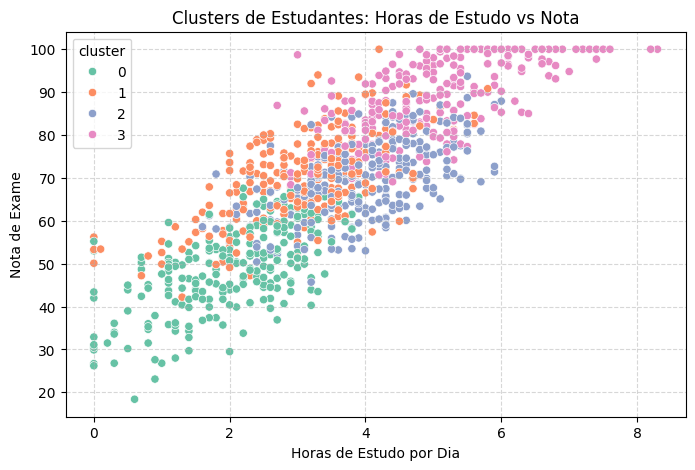

,study_hours_per_day,netflix_hours,social_media_hours,exam_score,mental_health_rating,attendance_percentage
cluster,,,,,,
0,2.01,2.46,2.81,48.61,4.41,85.01
1,3.08,1.51,2.00,70.35,7.56,77.29
2,3.94,1.38,2.75,69.70,2.92,85.58
3,5.03,2.01,2.44,88.57,7.17,88.34


In [59]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Estudo vs Nota de Exame
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_cluster,
    x='study_hours_per_day',
    y='exam_score',
    hue='cluster',
    palette='Set2'
)
plt.title('Clusters de Estudantes: Horas de Estudo vs Nota')
plt.xlabel('Horas de Estudo por Dia')
plt.ylabel('Nota de Exame')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

df_cluster.groupby('cluster').mean().round(2)

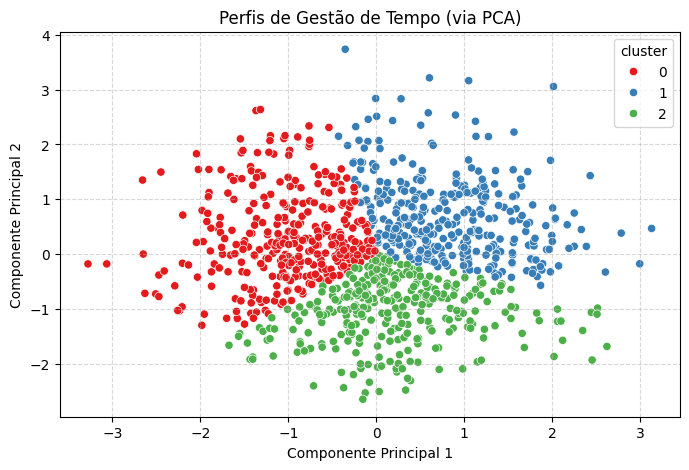

,study_hours_per_day,sleep_hours,exercise_frequency,netflix_hours,social_media_hours
cluster,,,,,
0,2.50,6.92,4.21,2.18,2.29
1,3.97,6.52,1.59,2.07,3.34
2,4.24,5.93,3.33,1.16,1.85


In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleção de colunas relevantes
time_vars = ['study_hours_per_day', 'sleep_hours', 'exercise_frequency', 'netflix_hours', 'social_media_hours']
df_time = df[time_vars].dropna()

# Normalização
scaler = StandardScaler()
X_time_scaled = scaler.fit_transform(df_time)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_time_scaled)

# Adicionar ao DataFrame
df_time_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

kmeans = KMeans(n_clusters=3, random_state=42)
df_time_pca['cluster'] = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_time_pca,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='Set1'
)
plt.title('Perfis de Gestão de Tempo (via PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Vincular rótulos originais para análise
df_time_clustered = df.loc[df_time.index].copy()
df_time_clustered['cluster'] = df_time_pca['cluster'].values

# Comparar perfis médios
df_time_clustered.groupby('cluster')[time_vars].mean().round(2)

Cluster	Nome	Perfil Comportamental

0	- *Equilibrados*	- Média de estudo razoável, boa quantidade de sono, alto nível de exercício, consumo moderado de lazer digital.

1	- *Overdose de Dopamina*	- Estudam bem, mas dormem pouco e quase não se exercitam; passam muito tempo em redes sociais.

2	- *Focados e Intensos*	- Mais tempo dedicado ao estudo, menos lazer, menos sono e exercícios em níveis médios.


In [61]:
# Identificar alunos com risco de saúde mental e baixo desempenho
risk_mental_perf = df[
    (df['study_hours_per_day'] < 2) &
    (df['social_media_hours'] > 3) &
    (df['mental_health_rating'] < 5)
]

print(f"Alunos com risco acadêmico e mental identificado: {len(risk_mental_perf)}")
#risk_mental_perf[['student_id', 'study_hours_per_day', 'social_media_hours', 'mental_health_rating']].head()

Alunos com risco acadêmico e mental identificado: 23


In [62]:
# Identificar alunos com risco por estilo de vida
risk_lifestyle = df[
    (df['attendance_percentage'] < 60) &
    (df['part_time_job'] == 'Yes') &
    (df['diet_quality'] == 'Poor')
]

print(f"Alunos com risco de presença e estilo de vida prejudicial: {len(risk_lifestyle)}")
#risk_lifestyle[['student_id', 'attendance_percentage', 'part_time_job', 'diet_quality']]

Alunos com risco de presença e estilo de vida prejudicial: 0
